## Building a Chatbot

In [18]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph , START ,END

from langgraph.graph.message import add_messages

In [19]:
class State(TypedDict):
    # messages have the type "list". The add_messages function in the annotation defines how this state key should be updated.
    # In this case, it appends messages to the list, rather than overwriting them.
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [20]:
graph_builder

In [21]:
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [22]:
from langchain_groq import ChatGroq 
from langchain.chat_models import init_chat_model

llm = ChatGroq(model ="llama-3-8b-8192")

In [24]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000015B0944FA10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000015B09C7C590>, model_name='llama-3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
llm = init_chat_model("groq:llama-3-8b-8192")
llm
# another way to initialize the model
# llm = init_chat_model("groq:llama-3-8b-
# if i'm using openai, i can use the following code
# llm = init_chat_model("openai:gpt-4o")

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000015B09BD6D70>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000015B09BD7360>, model_name='llama-3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [28]:
# node function to add a message to the state
def chatbot(state:State):
    # This function will be called when the graph is executed.
    # It takes the current state as an argument and returns a new state.
    return {"messages": [llminvke(state["messages"])]}


In [29]:
graph_builder = StateGraph(State)

# adding nodes here 
graph_builder.add_node("llmchatbot",chatbot)

# adding an edge from the start node to the llmchatbot node
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)

# compiling the graph
graph = graph_builder.compile()



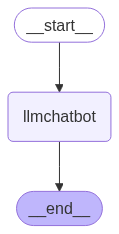

In [32]:
## visualizing the graph 

from IPython.display import display,Image

try:

    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception :
    pass

In [33]:
#42:00 endd time 
